# Version 3.0

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
import sklearn
from transformers import pipeline, AutoTokenizer, logging
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Suppress unnecessary warnings from the transformers library
logging.set_verbosity_error()

# Step 1: Load the dataset
file_path = 'combined_amazon_reviews.csv'
data = pd.read_csv(file_path, low_memory=False)




In [12]:
# Step 2: Drop rows with missing or empty review text
data.dropna(subset=['reviews.text'], inplace=True)  # Drop rows where review text is NaN
data = data[data['reviews.text'].str.strip() != '']  # Drop rows where review text is empty


In [13]:
# Randomly sample 1000 rows from the dataset
data = data[['reviews.text']].sample(n=1000, random_state=42) 

In [14]:
# Step 3: Load the tokenizer and sentiment analysis model

#model_name = "distilbert-base-uncased"  # You can use another pre-trained model if you prefer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
# Step 4.1
def get_sentiment(review):
    try:
        # Tokenize and truncate the text
        tokens = tokenizer(review, truncation=True, max_length=512, return_tensors="pt")
        # Get sentiment prediction
        result = sentiment_analysis(tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))
        
        # Print full model output for debugging
        print(f"Full Model Output for Review: {review}\n{result}")
        
        # Extract label from model output
        result = sentiment_analysis(review)
        label = result[0]['label']
        return label
    except Exception as e:
        print(f"Error processing review: {review}\nError: {str(e)}")
        return "None"

# Code that works

In [16]:
# Step 5: Apply the sentiment analysis model to each review and map the labels
data['sentiment'] = data['reviews.text'].apply(get_sentiment)


Full Model Output for Review: Bought as gift for my granddaughter who is 10. She loves it. Plays games, watches videos and listens to music.
[{'label': 'positive', 'score': 0.9668719172477722}]
Full Model Output for Review: This a great tablet for child. I got this for my niece who is about to turn 3 years old. She love the games and the TV shows that was included with the tablet.
[{'label': 'positive', 'score': 0.9863132238388062}]
Full Model Output for Review: I can do a lot of things on my Kindle I used to rely on the computer for.
[{'label': 'positive', 'score': 0.5783372521400452}]
Full Model Output for Review: I needed batteries for a set of walkie talkies that I ordered from Amazon. I ordered these at the same time to make sure I had batteries. These seem to last as long as any other brand.
[{'label': 'neutral', 'score': 0.6095945239067078}]
Full Model Output for Review: I love anything amazon...
[{'label': 'positive', 'score': 0.9827673435211182}]
Full Model Output for Review: 

In [17]:

def get_score(review):
    try:
        # Tokenize and truncate the text
        tokens = tokenizer(review, truncation=True, max_length=512, return_tensors="pt")
        # Get sentiment prediction
        result = sentiment_analysis(tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))
        
        # Print full model output for debugging
        print(f"Full Model Output for Review: {review}\n{result}")
        
        # Extract label from model output
        result = sentiment_analysis(review)
        label = result[0]['score']
        return label
    except Exception as e:
        print(f"Error processing review: {review}\nError: {str(e)}")
        return "None"

In [18]:
data["reviews.text"][0]

KeyError: 0

In [28]:
data['score'] = data['reviews.text'].apply(get_score)

Full Model Output for Review: I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
[{'label': 'negative', 'score': 0.9205968976020813}]
Full Model Output for Review: Bulk is always the less expensive way to go for products like these
[{'label': 'neutral', 'score': 0.6053089499473572}]
Full Model Output for Review: Well they are not Duracell but for the price i am happy.
[{'label': 'positive', 'score': 0.7650973796844482}]
Full Model Output for Review: Seem to work as well as name brand batteries at a much better price
[{'label': 'positive', 'score': 0.8743552565574646}]
Full Model Output for Review: These batteries are very long lasting the price is great.
[{'label': 'positive', 'score': 0.9762579798698425}]
Full Model Output for Review: Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basi

In [29]:
# Step 6: Display the results
print(data[['reviews.text', 'sentiment']].head())

                                        reviews.text sentiment
0  I order 3 of them and one of the item is bad q...  negative
1  Bulk is always the less expensive way to go fo...   neutral
2  Well they are not Duracell but for the price i...  positive
3  Seem to work as well as name brand batteries a...  positive
4  These batteries are very long lasting the pric...  positive


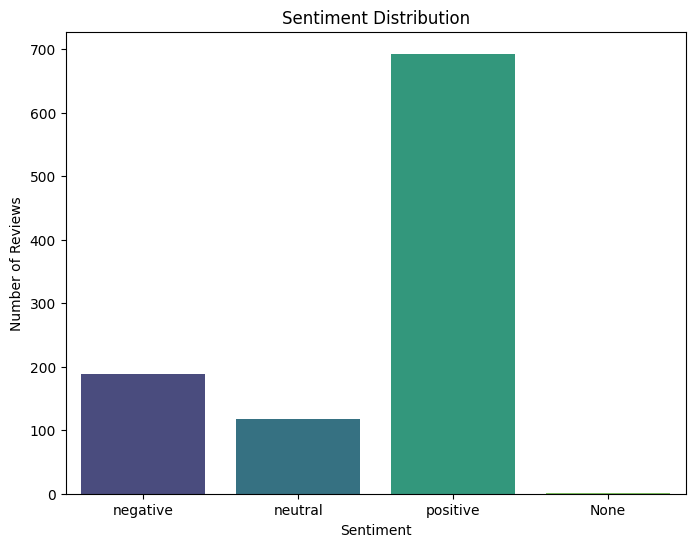

In [30]:
# Step 7: Visualize sentiment distribution using countplot (corrected)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='viridis', hue='sentiment', dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [31]:
data = data[data['score'] != 'None']
print (data.head())

data = data[data['sentiment'] != 'None']	
print (data.head())

                                        reviews.text sentiment     score
0  I order 3 of them and one of the item is bad q...  negative  0.920597
1  Bulk is always the less expensive way to go fo...   neutral  0.605309
2  Well they are not Duracell but for the price i...  positive  0.765097
3  Seem to work as well as name brand batteries a...  positive  0.874355
4  These batteries are very long lasting the pric...  positive  0.976258
                                        reviews.text sentiment     score
0  I order 3 of them and one of the item is bad q...  negative  0.920597
1  Bulk is always the less expensive way to go fo...   neutral  0.605309
2  Well they are not Duracell but for the price i...  positive  0.765097
3  Seem to work as well as name brand batteries a...  positive  0.874355
4  These batteries are very long lasting the pric...  positive  0.976258


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Step 1: Define a function to classify based on the score threshold
def classify_sentiment(score):
    if score >= 0.75:
        return 'positive'
    elif 0.5 <= score < 0.75:
        return 'neutral'
    else:
        return 'negative'

# Step 2: Apply the classification function to the 'score' column
data['predicted_sentiment'] = data['score'].apply(classify_sentiment)

# Step 3: Extract true and predicted sentiments
true_sentiment = data['sentiment']
predicted_sentiment = data['predicted_sentiment']

# Step 4: Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_sentiment, predicted_sentiment)
precision = precision_score(true_sentiment, predicted_sentiment, average='weighted')
recall = recall_score(true_sentiment, predicted_sentiment, average='weighted')
f1 = f1_score(true_sentiment, predicted_sentiment, average='weighted')

# Step 5: Print the metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Optional: Print the dataframe with true and predicted sentiments
print(data)


# Asking the user input to generative a robo review

In [63]:
from transformers import pipeline

# Step 1: Initialize GPT-2 text generation model pipeline
review_generation_pipeline = pipeline("text-generation", model="gpt2")

# Step 2: Function to generate a natural review using GPT-2 with N-shot prompting
def generate_natural_review_with_n_shot(product, category, sentiment, n_shot_examples):
    # Provide a few examples for N-shot prompting
    examples_prompt = f"Here are some customer reviews for various products:\n\n"
    
    # Add the N-shot examples to the prompt
    for example in n_shot_examples:
        examples_prompt += example + "\n\n"

     # Add the new review prompt for the specific product, category, and sentiment
    review_prompt = f"I bought the {product} in the {category} category and it was"
    
    # Adjust the review prompt based on the desired sentiment
    if sentiment == "Positive":
        review_prompt += " absolutely amazing. I loved it because"
    elif sentiment == "Negative":
        review_prompt += " quite disappointing. I was not happy because"
    elif sentiment == "Neutral":
        review_prompt += " fine but nothing special. It worked as expected but"
    
    # Combine the examples with the review prompt, but we'll only use the generated portion
    full_prompt = examples_prompt + review_prompt

    # Generate the review using GPT-2 with the prompt
    generated_output = review_generation_pipeline(full_prompt, max_new_tokens=50, num_return_sequences=1)[0]['generated_text']

    # Step 3: Remove the examples part from the generated output, keeping only the review part
    generated_review = generated_output.split(review_prompt)[-1].strip()
    
    return review_prompt + generated_review

In [1]:
# Step 3: N-shot examples for different sentiments
n_shot_examples = [
    "I bought the headphones and they were absolutely amazing! The sound quality was crystal clear and the comfort was top-notch. I would highly recommend them to anyone. (Positive)",
    "I purchased the phone charger and it was disappointing. It broke within a week and didn’t work well at all. I wouldn’t recommend this to others. (Negative)",
    "I got the blender, and it was okay. It worked as expected, but there was nothing special about it. It does the job, but I don’t feel strongly either way. (Neutral)"
    "Just got this new phone, and its wonderful, it has all the new bells and whistles.(Positive)"
    "I decided to buy this laptop and its okay it works (Neutral)"
    "Buying a dishwasher is never easy but I bought this model and oh wow for the price its horrific it consumes more electricity than my washing machiene (Negative)"
]

# Step 4: Get user input for product, category, and desired sentiment
product_name = input("Enter the product name: ")
category = input("Enter the product category: ")
sentiment_choice = input("Enter the desired sentiment (Positive, Negative, Neutral): ").capitalize()

# Step 5: Generate the review based on the input and N-shot prompting
generated_review = generate_natural_review_with_n_shot(product_name, category, sentiment_choice, n_shot_examples)

# Step 6: Display the generated review
#print(f"Generated Review: {generated_review}")

for i, review in enumerate(generated_reviews, 1):
    print(f"Generated Review {i}: {review}\n")


NameError: name 'generate_natural_review_with_n_shot' is not defined

In [48]:
from transformers import pipeline

# Step 1: Initialize GPT-2 text generation model pipeline
review_generation_pipeline = pipeline("text-generation", model="gpt2")

# Step 2: Function to generate multiple reviews using GPT-2
def generate_aggregated_reviews(product, category, sentiment, num_reviews=5):
    # Construct a starting prompt based on product, category, and sentiment
    prompt = f"I bought the {product} in the {category} category and it was"
    
    # Adjust prompt based on the desired sentiment
    if sentiment == "Positive":
        prompt += " absolutely amazing. I loved it because"
    elif sentiment == "Negative":
        prompt += " quite disappointing. I was not happy because"
    elif sentiment == "Neutral":
        prompt += " fine but nothing special. It worked as expected but"
    
    # Generate multiple reviews using GPT-2 with the prompt
    generated_reviews = review_generation_pipeline(prompt, max_length=100, num_return_sequences=num_reviews)

    # Extract and return each generated review
    return [review['generated_text'] for review in generated_reviews]

# Step 3: Get user input for product, category, and desired sentiment
product_name = input("Enter the product name: ")
category = input("Enter the product category: ")
sentiment_choice = input("Enter the desired sentiment (Positive, Negative, Neutral): ").capitalize()

# Step 4: Generate the reviews based on the input and GPT-2
generated_reviews = generate_aggregated_reviews(product_name, category, sentiment_choice)

# Step 5: Display the generated reviews
for i, review in enumerate(generated_reviews, 1):
    print(f"Generated Review {i}: {review}\n")


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated Review 1: I bought the Firge in the electric category and it was quite disappointing. I was not happy because of this but I still think it would have been better to keep up this price. I feel I was able to get the same quality of service as the EVE EVO. All of the items I ordered were shipped to me. I believe that some of the ones I got are good quality. And of course the product they offered us were very special. I've heard people have even had my

Generated Review 2: I bought the Firge in the electric category and it was quite disappointing. I was not happy because I didn't see the difference after several months and then not getting anything (laughs). But I believe this is the one with the light in it. Even if my performance is not good, when I get to show others the product that it was made for, as opposed to all the other things here - all the things we already have and don't need - he's not giving me this stuff for

Generated Review 3: I bought the Firge in the electric